In [1]:
## python modules used within this notebook
import numpy as np
import matplotlib.pyplot as plt
import happi
from matplotlib.pyplot import *


plt.rcParams['animation.embed_limit'] = 200.
%matplotlib inline

In [2]:
cases = ['']

First, we focus on a single simulation

In [3]:
path = "../../work_dir/SR/Radiation_Landau_Lifshitz"

 Space steps: 0.098175 0.098175


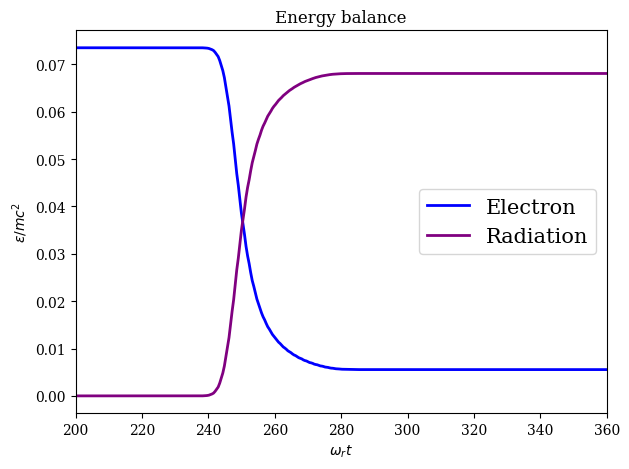

In [4]:
# open Smilei results
S = happi.Open(path, verbose=False)

# Parameters
dt = S.namelist.Main.timestep
dx = S.namelist.Main.cell_length[0]
dy = S.namelist.Main.cell_length[1]
simulation_time = S.namelist.Main.simulation_time

print(' Space steps: %f %f'%(dx,dy))

# ______________________________________________________________________________
# Figure

fig0 = figure()
gs = GridSpec(2, 3)
ax0 = subplot(gs[:,:])

# ______________________________________________________________________________
# Scalar diagnostics

times = S.Scalar("Ukin_electron").getTimes()

# electron kinetic energy
ukin_electron = S.Scalar("Ukin_electron").getData()
ukin_electron_LL = ukin_electron

# Radiated energy wihtout the macro-photons
urad = S.Scalar("Urad").getData()

ax0.plot(times,ukin_electron,color='b',label="Electron",lw=2)
ax0.plot(times,urad,color='purple',label="Radiation",lw=2)

# ______________________________________________________________________________
# Figure properties

t = ax0.set_title('Energy balance')
ax0.set_xlabel(r'$\omega_r t$')
ax0.set_ylabel(r'$\varepsilon / mc^2$')
ax0.set_xlim([200,360])
#ax0.set_yscale('log')

ax0.legend(loc='best', fontsize=15)

fig0.tight_layout()

show()

 Space steps: 0.098175 0.098175


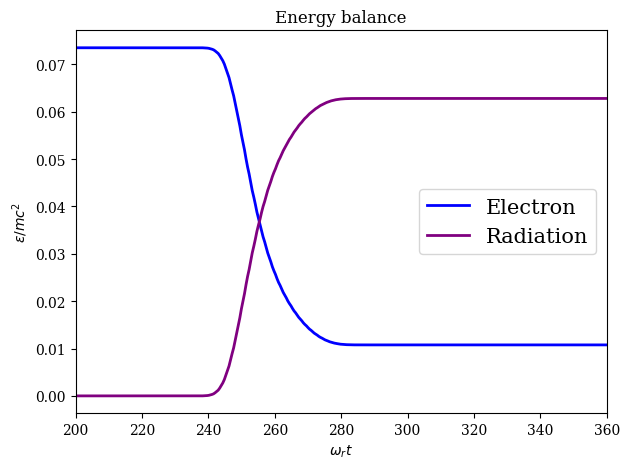

In [5]:
path = "../../work_dir/SR/Radiation_corrected_Landau_Lifshitz"
S = happi.Open(path, verbose=False)

# Parameters
dt = S.namelist.Main.timestep
dx = S.namelist.Main.cell_length[0]
dy = S.namelist.Main.cell_length[1]
simulation_time = S.namelist.Main.simulation_time

print(' Space steps: %f %f'%(dx,dy))

# ______________________________________________________________________________
# Figure

fig0 = figure()
gs = GridSpec(2, 3)
ax0 = subplot(gs[:,:])

# ______________________________________________________________________________
# Scalar diagnostics

times = S.Scalar("Ukin_electron").getTimes()

# electron kinetic energy
ukin_electron = S.Scalar("Ukin_electron").getData()

# Radiated energy wihtout the macro-photons
urad = S.Scalar("Urad").getData()

ax0.plot(times,ukin_electron,color='b',label="Electron",lw=2)
ax0.plot(times,urad,color='purple',label="Radiation",lw=2)

# ______________________________________________________________________________
# Figure properties

t = ax0.set_title('Energy balance')
ax0.set_xlabel(r'$\omega_r t$')
ax0.set_ylabel(r'$\varepsilon / mc^2$')
ax0.set_xlim([200,360])
#ax0.set_yscale('log')

ax0.legend(loc='best', fontsize=15)

fig0.tight_layout()

show()

 Space steps: 0.098175 0.098175


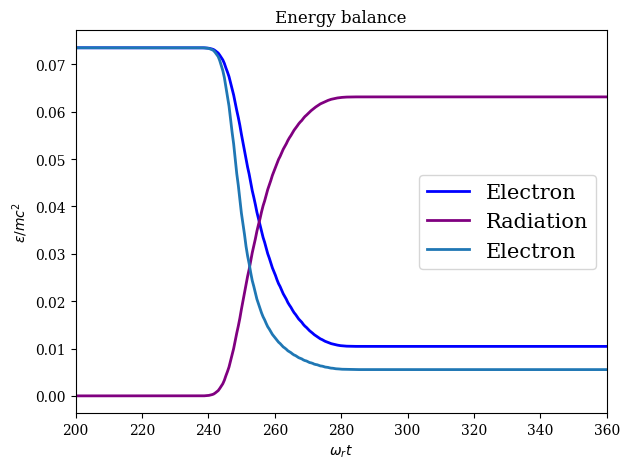

In [6]:
path = "../../work_dir/SR/Radiation_Monte_Carlo"
S = happi.Open(path, verbose=False)

# Parameters
dt = S.namelist.Main.timestep
dx = S.namelist.Main.cell_length[0]
dy = S.namelist.Main.cell_length[1]
simulation_time = S.namelist.Main.simulation_time

print(' Space steps: %f %f'%(dx,dy))

# ______________________________________________________________________________
# Figure

fig0 = figure()
gs = GridSpec(2, 3)
ax0 = subplot(gs[:,:])

# ______________________________________________________________________________
# Scalar diagnostics

times = S.Scalar("Ukin_electron").getTimes()

# electron kinetic energy
ukin_electron = S.Scalar("Ukin_electron").getData()

# Radiated energy wihtout the macro-photons
urad = S.Scalar("Urad").getData()

ax0.plot(times,ukin_electron,color='b',label="Electron",lw=2)
ax0.plot(times,urad,color='purple',label="Radiation",lw=2)
ax0.plot(times,ukin_electron_LL,label="Electron",lw=2)

# ______________________________________________________________________________
# Figure properties

t = ax0.set_title('Energy balance')
ax0.set_xlabel(r'$\omega_r t$')
ax0.set_ylabel(r'$\varepsilon / mc^2$')
ax0.set_xlim([200,360])
#ax0.set_yscale('log')

ax0.legend(loc='best', fontsize=15)

fig0.tight_layout()

show()